## Анализ продаж компьютерных игр

Задача: выявить определяющие успешность игры закономерности.

#### Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB 

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from math import factorial
import math
import warnings
warnings.filterwarnings('ignore')

### <span style="color:blue"> Шаг 1: Чтение файла и сводная информация<span>

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13323,Summoner: A Goddess Reborn,GC,2003.0,Role-Playing,0.04,0.01,0.00,0.00,72.0,tbd,T
9172,The Bombing Islands,PS,1997.0,Platform,0.08,0.05,0.00,0.01,NaN,NaN,NaN
7048,Mega Man Battle Network 5: Team Colonel / Prot...,GBA,2004.0,Role-Playing,0.16,0.06,0.00,0.00,NaN,NaN,NaN
14380,Togainu no Chi: True Blood,PS2,2008.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
7098,Bass Pro Shops: The Hunt,Wii,2010.0,Sports,0.21,0.00,0.00,0.01,NaN,tbd,T


### <span style="color:blue"> Шаг 2: Подготовка данных<span>

Приведение названий столбцов к нижнему регистру

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Подсчет количества пропущенных значений

In [4]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [5]:
#проверила нет ли дубликатов
df.duplicated().sum()

0

Заполняю пропуски в столбце с рейтингом на "не указан"

In [6]:
df['rating'] = df['rating'].fillna('не указан')

Анализ оценок пользователей

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
# смотрю что такое tdb
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Из данных я не поняла что это. Загуглила что tbd это(To Be Determined) рейтинг не определен, заменяю значения на 0, потому что мне нужно изменить тип этого столбца. Также заменяю пропуски в user_score на 0 , тк мне нужен этот столбец без пропусков для статистического теста.

In [9]:
df.loc[df['user_score'] == "tbd", 'user_score'] = 0
df['user_score'] = df['user_score'].fillna(0)

In [10]:
df['user_score'] = df['user_score'].astype('float64')

Меняю тип столбца с годом выпуска игры на целочисленное значение, пропуски заменяю на 0

In [11]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')

Добавляю новый столбец с суммарным значением продаж

In [12]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [13]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
11925,Port Royale 3,PS3,0,Simulation,0.06,0.00,0.00,0.01,NaN,8.9,T,0.07
5508,We Sing Deutsche Hits,Wii,2011,Misc,0.00,0.29,0.00,0.04,NaN,0.0,не указан,0.33
11400,Cloudy With a Chance of Meatballs,PSP,2009,Platform,0.07,0.00,0.00,0.01,NaN,0.0,E,0.08
6623,Final Fantasy Crystal Chronicles: Echoes of Time,Wii,2009,Role-Playing,0.13,0.06,0.05,0.02,64.0,5.6,E10+,0.26
4974,Diner Dash: Sizzle & Serve,DS,2007,Puzzle,0.33,0.02,0.00,0.03,NaN,0.0,не указан,0.38
12779,Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...,PS2,2007,Misc,0.00,0.00,0.06,0.00,NaN,0.0,не указан,0.06
1175,Devil May Cry 4,PS3,2008,Action,0.58,0.45,0.34,0.20,84.0,8.2,M,1.57
12151,Future Card Buddy Fight: Yuujou no Bakunetsu F...,3DS,2015,Action,0.00,0.00,0.07,0.00,NaN,0.0,не указан,0.07
8814,Bomberman,DS,2005,Puzzle,0.10,0.01,0.03,0.01,75.0,7.0,E,0.15
4848,Harvest Moon: Save the Homeland,PS2,0,Simulation,0.19,0.15,0.00,0.05,76.0,8.8,E,0.39


In [14]:
df['name']=df['name'].fillna('не указан')
df = df.query('name != "не указан"')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
sum_sales          16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


Возможно, пропуски в столбцах с оценками пользователей и критиков появились из за времени выпуска игры. То есть, если игра только вышла, ее еще не купили и не успели оценить пользователи и на месте пропусков должно быть "TBD". Также может быть, что на сайте, с которого брались оценки данная игра не представлена. То же, наверное, и с рейтингом. 
Там где были 2 пропуска в названии игры и жанре, возможно технический сбой.

### <span style="color:blue"> Шаг 3: Исследовательский анализ данных<span>

##### Анализ количества игр по годам

In [16]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Text(0, 0.5, 'Количество игр')

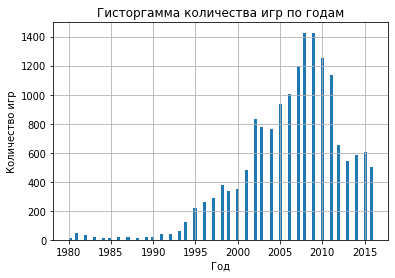

In [17]:
df.hist('year_of_release', bins=100, range=(1980, 2016))
plt.title('Гисторгамма количества игр по годам', fontsize=12)
plt.xlabel("Год")
plt.ylabel("Количество игр")

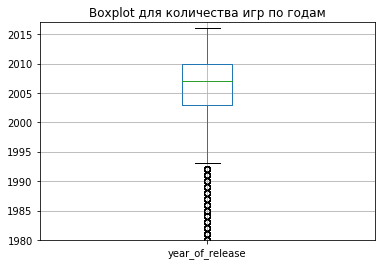

In [18]:
plt.ylim(1980, 2017)
df.boxplot('year_of_release')
plt.title('Boxplot для количества игр по годам', fontsize=12)
plt.show()

In [19]:
#отрезаю хвост по усам боксплота с играми до 1993
df = df.query('year_of_release > 1993')

Все выглядит вполне логично, компьютерные технологии развиваются, колличество игр увеличивается. Не понятно что за яма в 2012-2014, последствия экономического кризиса? Попыталась загуглить что там творилось на рынке компьютерных игр, не очень успешно)

##### Анализ продаж по платформам

In [20]:
df.pivot_table(index='platform', values='sum_sales', aggfunc=('sum')).sort_values(by='sum_sales', ascending=False)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выделила первые 6 платформ как самые крупные, тк после PS суммарные продажи падает вдвое.

In [21]:
#платформы с наибольшими продажами
top_platform =['PS2', 'PS3', 'X360', 'Wii', 'DS', 'PS']

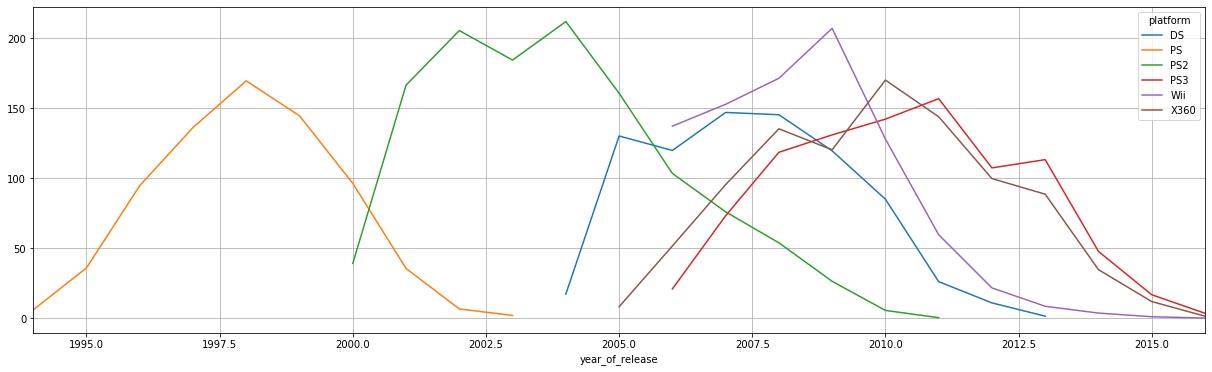

In [22]:
#смотрю динамику по годам самых крупных платформ
df.query('platform.isin(@top_platform)').pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(21, 6))
plt.show()

Платформы в среднем существуют около 10 лет.

##### Анализ за актуальный период

Исходя из предыдущего графика, отмечаю, что до 2004 года образовалось только 2 платформы с крупными продажами, а после платформ стало появлятся больше. Определяю актуальный период, как время когда стало появлятся большее количество прибыльных платформ.

In [23]:
df = df.query('year_of_release > 2004')

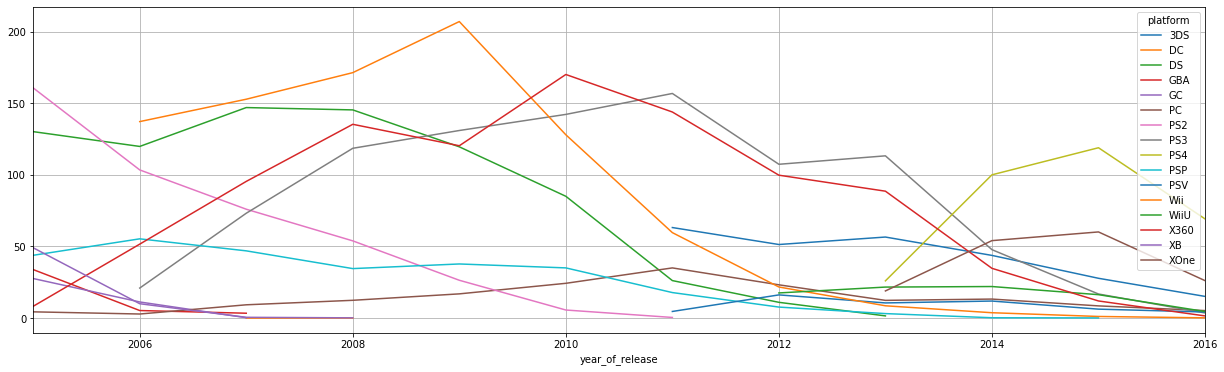

In [24]:
df.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(21, 6))
plt.show()

Из графика видна общая тенденция к снижению продаж. В 2015 году продажи выросли по сравнению с предыдущим годом только у платформы PS4 и XOne. Выделю их как перспективные.

In [25]:
df = df.query('year_of_release >= 2013')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         2233 non-null float64
rating             2233 non-null object
sum_sales          2233 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Отфильтровала еще раз, выбираю 2013 исходя из графика, тк в это время начали набирать силу PS4 и XOne. 

Я так и думала сначала, что надо резать ближе к 2010 просто из логических соображений, но побоялась удалить слишком много, вот было же 16тыс записей, а стало всего 2тыс.

##### Boxplot по продажам 

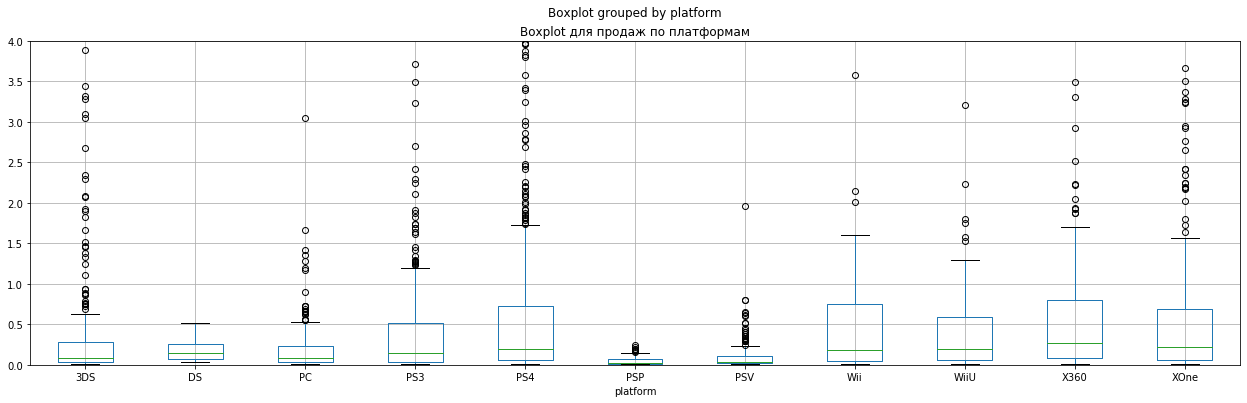

In [27]:
df.boxplot('sum_sales', by='platform', figsize=(21, 6))
plt.ylim(0, 4)
plt.title('Boxplot для продаж по платформам', fontsize=12)
plt.show()

Медианные значения продаж по платформам не сильно отличаются. Но у топовых платформ длиннее усы boxplot.

##### Зависимость продаж от отзывов пользователей

Анализ зависимости продаж от отзывов для одной из крупных платформ (XOne).

In [28]:
t = df.query('user_score > 0 and platform == "XOne"')

In [29]:
bounds_sales = t['sum_sales'].quantile([0.05, 0.95]).values
for b, s in zip(bounds_sales, ['lower', 'upper']):
    print(f"{s} bound of sales: {b:.5f}")

lower bound of sales: 0.01000
upper bound of sales: 2.94850


In [30]:
bounds_user = t['user_score'].quantile([0.05, 0.95]).values
for b, s in zip(bounds_user, ['lower', 'upper']):
    print(f"{s} bound of user: {b:.5f}")

lower bound of user: 4.10000
upper bound of user: 8.30000


In [31]:
# отфильтруем 5% аномально больших значений
t_filtered1 = t[(t['sum_sales'] <= bounds_sales[1]) &
  (t['user_score'] <= bounds_user[1])]

Корреляция между отзывами пользователей и продажами: -0.021


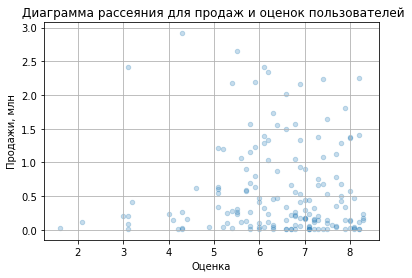

In [32]:
t_filtered1.plot(y='sum_sales', x='user_score', kind='scatter', grid=True, alpha=0.25)
plt.title(' Диаграмма рассеяния для продаж и оценок пользователей', fontsize=12)
plt.xlabel("Оценка")
plt.ylabel("Продажи, млн")
print(f"Корреляция между отзывами пользователей и продажами: {t_filtered1['sum_sales'].corr(df['user_score']):.3f}")

Для этой платформы получается совсем нет связи между оценками пользователей и продажами..

##### Зависимость продаж от отзывов критиков

In [33]:
t = t.query('critic_score > 0')

In [34]:
bounds_critic = t['critic_score'].quantile([0.05, 0.95]).values
for b, s in zip(bounds_user, ['lower', 'upper']):
    print(f"{s} bound of user: {b:.5f}")

lower bound of user: 4.10000
upper bound of user: 8.30000


In [35]:
# отфильтруем 5% аномально больших значений
t_filtered2 = t[(t['sum_sales'] <= bounds_sales[1]) &
  (t['critic_score'] <= bounds_critic[1])]

Корреляция между отзывами критиков и продажами: 0.408


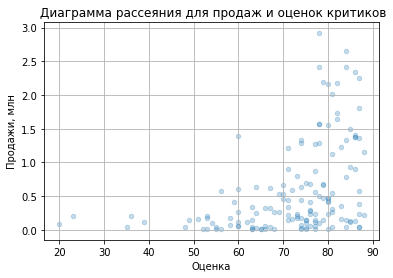

In [36]:
t_filtered2.plot(y='sum_sales', x='critic_score', kind='scatter', grid=True, alpha=0.25)
plt.title(' Диаграмма рассеяния для продаж и оценок критиков', fontsize=12)
plt.xlabel("Оценка")
plt.ylabel("Продажи, млн")
print(f"Корреляция между отзывами критиков и продажами: {t_filtered2['sum_sales'].corr(df['critic_score']):.3f}")

Продажи зависят только от оценок критиков.

##### Распределение игр по жанрам

In [37]:
df.pivot_table(index='genre', values='sum_sales', aggfunc=('count', 'sum')).sort_values(by='sum', ascending=False)

,count,sum
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,214,150.65
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


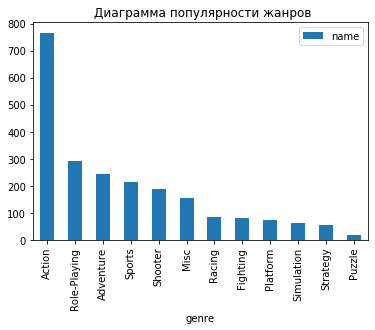

In [38]:
df.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(kind='bar')
plt.title(' Диаграмма популярности жанров', fontsize=12)
plt.show()

Жанр Action гораздо популярнее других. Игры жанра Adventure выпускались большим количеством, но не прибыльны. Shooter выпускаются меньшим количеством чем Adventure, но продажи их выше.

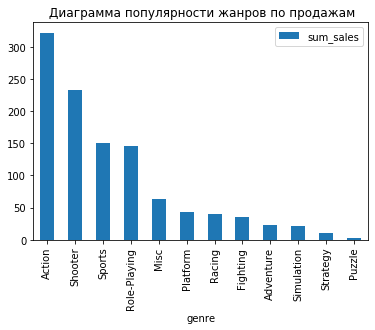

In [39]:
df.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).plot(kind='bar')
plt.title(' Диаграмма популярности жанров по продажам', fontsize=12)
plt.show()

### <span style="color:blue"> Шаг 4: Портрет пользователя региона<span>

#### Северная Америка

Топ 5 платформ с наибольшей суммой продаж в Северной Америке

In [40]:
na = df.pivot_table(index='platform', values='na_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False).head()
na.columns=['na_mean', 'na_sum'] 
na

,na_mean,na_sum
platform,,
PS4,0.277398,108.74
XOne,0.377004,93.12
X360,0.439032,81.66
PS3,0.184058,63.50
3DS,0.126073,38.20


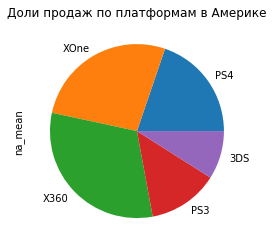

In [41]:
na['na_mean'].plot(kind='pie')
plt.title('Доли продаж по платформам в Америке', fontsize=12)
plt.show()

Топ 5 жанров с наибольшей суммой продаж в Северной Америке

In [42]:
na_genre = df.pivot_table(index='genre', values='na_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False).head()
na_genre.columns=['na_genre_mean', 'na_genre_sum'] 
na_genre

,na_genre_mean,na_genre_sum
genre,,
Action,0.164556,126.05
Shooter,0.586845,109.74
Sports,0.305000,65.27
Role-Playing,0.158904,46.40
Misc,0.177355,27.49


Зависимость продаж от рейтинга

In [43]:
na_rating = df.query('rating != "не указан"').pivot_table(index='rating', values='na_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False)
na_rating.columns=['na_rating_mean', 'na_rating_sum'] 
na_rating

,na_rating_mean,na_rating_sum
rating,,
M,0.447724,165.21
E,0.261755,79.05
E10+,0.215238,54.24
T,0.149520,49.79


#### Европа

Топ 5 платформ с наибольшей суммой продаж в Европе

In [44]:
eu = df.pivot_table(index='platform', values='eu_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False).head()
eu.columns=['eu_mean', 'eu_sum']  
eu

,eu_mean,eu_sum
platform,,
PS4,0.359923,141.09
PS3,0.196551,67.81
XOne,0.208866,51.59
X360,0.228602,42.52
3DS,0.102178,30.96


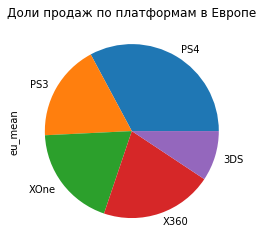

In [45]:
eu['eu_mean'].plot(kind='pie')
plt.title('Доли продаж по платформам в Европе', fontsize=12)
plt.show()

Топ 5 жанров с наибольшей суммой продаж в Европе

In [46]:
eu_genre = df.pivot_table(index='genre', values='eu_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False).head()
eu_genre.columns=['eu_genre_mean', 'eu_genre_sum'] 
eu_genre

,eu_genre_mean,eu_genre_sum
genre,,
Action,0.154217,118.13
Shooter,0.469840,87.86
Sports,0.282804,60.52
Role-Playing,0.126610,36.97
Racing,0.237529,20.19


Зависимость продаж от рейтинга

In [47]:
eu_rating = df.query('rating != "не указан"').pivot_table(index='rating', values='eu_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False)
eu_rating.columns=['eu_rating_mean', 'eu_rating_sum'] 
eu_rating

,eu_rating_mean,eu_rating_sum
rating,,
M,0.393821,145.32
E,0.276026,83.36
E10+,0.169405,42.69
T,0.125976,41.95


#### Япония

Топ 5 платформ с наибольшей суммой продаж в Японии

In [48]:
jp = df.pivot_table(index='platform', values='jp_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False).head()
jp.columns=['jp_mean', 'jp_sum']  
jp

,jp_mean,jp_sum
platform,,
3DS,0.223795,67.81
PS3,0.067681,23.35
PSV,0.051927,18.59
PS4,0.040714,15.96
WiiU,0.094609,10.88


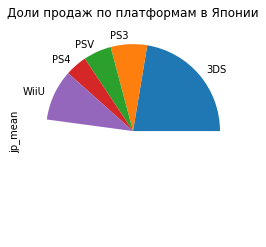

In [49]:
jp['jp_mean'].plot(kind='pie')
plt.title('Доли продаж по платформам в Японии', fontsize=12)
plt.show()

Топ 5 жанров с наибольшей суммой продаж в Японии

In [50]:
jp_genre = df.pivot_table(index='genre', values='jp_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False).head()
jp_genre.columns=['jp_genre_mean', 'jp_genre_sum'] 
jp_genre

,jp_genre_mean,jp_genre_sum
genre,,
Role-Playing,0.174795,51.04
Action,0.052859,40.49
Misc,0.059355,9.20
Fighting,0.095625,7.65
Shooter,0.035348,6.61


Зависимость продаж от рейтинга

In [51]:
jp_rating = df.query('rating != "не указан"').pivot_table(index='rating', values='jp_sales', aggfunc=('sum', 'mean')).sort_values(by='sum', ascending=False)
jp_rating.columns=['jp_rating_mean', 'jp_rating_sum'] 
jp_rating

,jp_rating_mean,jp_rating_sum
rating,,
T,0.061832,20.59
E,0.050132,15.14
M,0.038238,14.11
E10+,0.023373,5.89


### Сводная таблица по продажам платформ в разных регионах

In [52]:
d = eu.merge(na, how='outer', on=['platform'])
user_portrait = d.merge(jp, how='outer', on=['platform'])
user_portrait

,eu_mean,eu_sum,na_mean,na_sum,jp_mean,jp_sum
platform,,,,,,
PS4,0.359923,141.09,0.277398,108.74,0.040714,15.96
PS3,0.196551,67.81,0.184058,63.50,0.067681,23.35
XOne,0.208866,51.59,0.377004,93.12,NaN,NaN
X360,0.228602,42.52,0.439032,81.66,NaN,NaN
3DS,0.102178,30.96,0.126073,38.20,0.223795,67.81
PSV,NaN,NaN,NaN,NaN,0.051927,18.59
WiiU,NaN,NaN,NaN,NaN,0.094609,10.88


### Сводная таблица по продажам в зависимости от жанра в разных регионах

In [53]:
g = eu_genre.merge(na_genre, how='outer', on=['genre'])
user_portrait_genre = g.merge(jp_genre, how='outer', on=['genre'])
user_portrait_genre

,eu_genre_mean,eu_genre_sum,na_genre_mean,na_genre_sum,jp_genre_mean,jp_genre_sum
genre,,,,,,
Action,0.154217,118.13,0.164556,126.05,0.052859,40.49
Shooter,0.469840,87.86,0.586845,109.74,0.035348,6.61
Sports,0.282804,60.52,0.305000,65.27,NaN,NaN
Role-Playing,0.126610,36.97,0.158904,46.40,0.174795,51.04
Racing,0.237529,20.19,NaN,NaN,NaN,NaN
Misc,NaN,NaN,0.177355,27.49,0.059355,9.20
Fighting,NaN,NaN,NaN,NaN,0.095625,7.65


###### Вывод:
    1) Для пользователей из разных регионов характерны одинаковые предпочтения в выборе рейтинга игр. Везде лидируют игры рейтинга "для всех", "для подростков" и "для взрослых".
    2) В топе по продажам для всех пользователей платформы PS4 и PS3. В Европе и Америке пятерка топовых платформ одинаковая. В целом в Америке большая доля продаж в сравнении с другими регионами. В Японии XOne и X360 не популярны.
    3) Жанр Action в лидерах для всех пользователей. Shooter на втором месте по пулярности в Америке и Европе, но в Японии занимает 5 место. Самый популярный в Японии Role-Playing занимает 4 место в Америке и Европе.

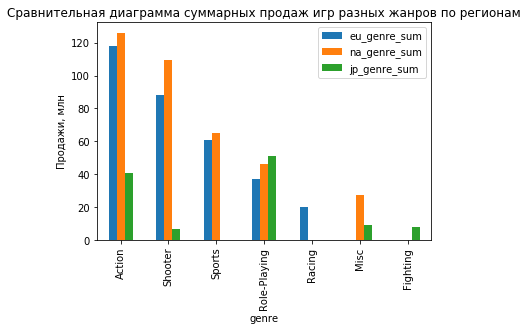

In [54]:
user_portrait_genre.drop(['eu_genre_mean', 'na_genre_mean', 'jp_genre_mean'], axis='columns', inplace=True)
user_portrait_genre.plot(kind='bar')
plt.title('Сравнительная диаграмма суммарных продаж игр разных жанров по регионам', fontsize=12)
plt.ylabel("Продажи, млн")
plt.show()

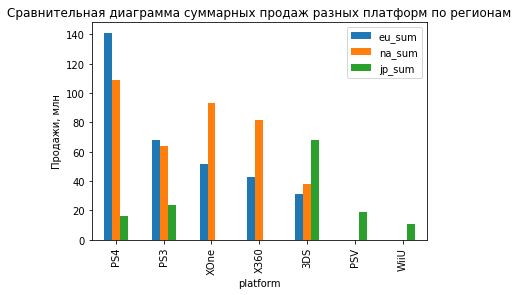

In [55]:
user_portrait.drop(['eu_mean', 'na_mean', 'jp_mean'], axis='columns', inplace=True)
user_portrait.plot(kind='bar')
plt.title('Сравнительная диаграмма суммарных продаж разных платформ по регионам', fontsize=12)
plt.ylabel("Продажи, млн")
plt.show()

<b>UPD: <font color='green'>В таком разрезе тоже интересно посмотреть.

<font color='green'>В остальнром все хорошо, портрет пользователя я увидел довольно четкий. Заказчику будет понятно, на какие платформы/жанры/рейтинги делать упор.

### <span style="color:blue"> Шаг 5: Проверка гипотез<span>

#### Сравнение пользовательских рейтингов XOne и PC

In [56]:
#дисперсия XOne
x = df.query('platform == "XOne" and user_score !=0')
variancex = np.var(x['user_score'])
variancex

1.8965188383045526

In [57]:
# Стандартное отклонение XOne
standard_deviation_x = np.std(x['user_score'])
standard_deviation_x

1.377141546212499

In [58]:
#средний пользовательский рейтинг XOne
x['user_score'].mean()

6.521428571428572

In [59]:
#дисперсия PC
p = df.query('platform == "PC" and user_score !=0')
variancep = np.var(p['user_score'])
variancep

3.016306347554631

In [60]:
# Стандартное отклонение PC
standard_deviation_p = np.std(p['user_score'])
standard_deviation_p

1.7367516654820374

In [61]:
#средний пользовательский рейтинг PC
p['user_score'].mean()

6.2696774193548395

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны

Дисперсии не равны. поэтому ставлю значение equal_var = False

In [62]:
xone = x['user_score']
pc = p['user_score']

alpha = .05 

results = st.ttest_ind(
    xone, 
    pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Значение p-value больше alpha, нулевая гипотеза подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC равны.

<font color='green'>Все верно, молодец, что не забываешь сравнить дисперсии.

<b>UPD: <font color='blue'>Видим, что ситуация в современном мире поменялась.

#### Сравнение пользовательских рейтингов жанров Action и Sports

In [63]:
#дисперсия Action
a = df.query('genre == "Action" and user_score !=0')
variancea = np.var(a['user_score'])
variancea

1.7648124186332366

In [64]:
# Стандартное отклонение Action
standard_deviation_a = np.std(a['user_score'])
standard_deviation_a

1.3284624265041283

In [65]:
#средний пользовательский рейтинг action
a['user_score'].mean()

6.837532133676092

In [66]:
#дисперсия Sports
s = df.query('genre == "Sports" and user_score !=0')
variances = np.var(s['user_score'])
variances

3.160733984375

In [67]:
# Стандартное отклонение Sports
standard_deviation_s = np.std(s['user_score'])
standard_deviation_s

1.7778453207112817

In [68]:
#средний пользовательский рейтинг sports
s['user_score'].mean()

5.238124999999999

- Нулевая гипотеза: средние пользовательские рейтинги в жанрах Action и Sports равны
- Альтернативная гипотеза: средние пользовательские рейтинги в жанрах Action и Sports не равны

In [69]:
action = a['user_score']
sports = s['user_score']

alpha = .05 

results = st.ttest_ind(
    action, 
    sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Значение pvalue очень маленькое, нулевая гипотеза не подтвердилась, средние пользовательские рейтинги в жанрах Action и Sports не будут равны.

<s><font color='brown'>Действительно, весь анализ, включая проверку гипотез нужно проводить на актуальных данных. Так что результаты проверки гипотез стоит перепроверить.

### <span style="color:blue"> Шаг 6: Вывод <span>

1. Был проведен исследовательский анализ данных:
 - выявлены топовые платформы ('PS2', 'PS3', 'X360', 'Wii', 'DS', 'PS')
 - определен актуальный период (данные после 2004 года)
 - оценена зависимость продаж от оценок пользователей и критиков (у критиков корреляция больше)
 - составлен портрет пользователя по регионам
         * в топе по продажам для всех пользователей платформы PS4 и PS3
         * жанр Action в лидерах для всех пользователей
         * везде лидируют игры рейтинга "для всех", "для подростков" и "для взрослых"
2. Был проведен статистический анализ данных:
    - в первом случае нулевая гипотеза подтвердилась: средние пользовательские рейтинги платформ Xbox One и PC равны
    - во втором случае подтвердилась альтернативная гипотеза: средние пользовательские рейтинги в жанрах Action и Sports не равны
    

<font color='green'>Хороший вывод по всем пунктам, разве что можно добавить непосредственные рещультаты анализа, регионов.

<font color='blue'>И после изменения периода тоже что-то может измениться, не забудь пересмотреть. 

<font color='blue'>Итак, у тебя отличный сборный проект. Ты показываешь хорошее владение всем изучаемым в модуле материалом. Уверенно пользуешься pandas, умеешь очищать данные, строишь отличные наглядные визуализации. Делаешь четкие обоснованные выводы. К оформлению работы также претензий нет.  
 Однако некоторые замечания у меня все же нашлись, уверен, тебе не составит труда их учесть и довести работу до идеала. Буду ждать доработанный проект, успехов!

<b>UPD: <font color='blue'>Ожидаемо, хорошая доработка, все вопросы закрыты. Принимаю проект. Поздравляю с окончанием модуля, впереди парсинг сайтов, работа с базами данных и еще много всего интересного, успехов!